<a href="https://colab.research.google.com/github/kamijoseph/Personalised-Health-and-Fitness/blob/main/notebook/fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Health and Fitness

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib

In [105]:
#loading the dataset
data = pd.read_csv("/content/bodyPerformance.csv")
data.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [106]:
data.shape

(13393, 12)

In [107]:
# checing the classes
data["class"].value_counts()

,count
class,
C,3349
D,3349
A,3348
B,3347


In [108]:
# checking for missing calues
data.isnull().sum()

,0
age,0
gender,0
height_cm,0
weight_kg,0
body fat_%,0
diastolic,0
systolic,0
gripForce,0
sit and bend forward_cm,0
sit-ups counts,0


In [109]:
# checking for duplicates
data.duplicated().sum()

np.int64(1)

In [110]:
# dropping the duplicate
data = data.drop_duplicates()
data.shape

(13392, 12)

In [111]:
data.duplicated().sum()

np.int64(0)

In [112]:
# brief information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13392 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13392 non-null  float64
 1   gender                   13392 non-null  object 
 2   height_cm                13392 non-null  float64
 3   weight_kg                13392 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13392 non-null  float64
 6   systolic                 13392 non-null  float64
 7   gripForce                13392 non-null  float64
 8   sit and bend forward_cm  13392 non-null  float64
 9   sit-ups counts           13392 non-null  float64
 10  broad jump_cm            13392 non-null  float64
 11  class                    13392 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.3+ MB


In [113]:
# brief statistical description
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797499,130.238120,36.964569,15.208933,39.770385,190.131355
std,13.625886,8.426305,11.949061,7.256829,10.742165,14.709536,10.624959,8.456904,14.276902,39.868988
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [114]:
# columns
columns = data.columns.tolist()
columns

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm',
 'class']

In [115]:
data["gender"].value_counts()

,count
gender,
M,8467
F,4925


In [116]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [117]:
data.columns = (
    data.columns.str.strip()
              .str.lower()
              .str.replace(r"\s+", "_", regex=True)
)
columns = data.columns.tolist()
columns

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body_fat_%',
 'diastolic',
 'systolic',
 'gripforce',
 'sit_and_bend_forward_cm',
 'sit-ups_counts',
 'broad_jump_cm',
 'class']

In [118]:
numeric_cols = data.drop(columns=["gender", "class"]).columns
numeric_cols

Index(['age', 'height_cm', 'weight_kg', 'body_fat_%', 'diastolic', 'systolic',
       'gripforce', 'sit_and_bend_forward_cm', 'sit-ups_counts',
       'broad_jump_cm'],
      dtype='object')

In [119]:
# calculating outliers usinf intequartile range (IQR mthod)
def detect_outliers(data, columns, multiplier=1.5):
  summary = []
  outlier_indices = set()

  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # outlier indices
    outliers = data[
        (data[column] < lower_bound) | (data[column] > upper_bound)
    ]
    outlier_indices.update(outliers)

    # appending
    summary.append({
        "Column": column,
        "Outlier_Count": len(outliers),
        "Percentage": round(
            (len(outliers) / len(data)) * 100, 2
        )
    })

  # creating a summary dataframe
  outlier_summary = pd.DataFrame(summary).sort_values(
      by = "Outlier_Count",
      ascending = False
  )
  return outlier_summary

In [120]:
# outliers
summary = detect_outliers(data, numeric_cols)
summary

,Column,Outlier_Count,Percentage
7,sit_and_bend_forward_cm,409,3.05
2,weight_kg,83,0.62
3,body_fat_%,77,0.57
9,broad_jump_cm,57,0.43
4,diastolic,54,0.40
5,systolic,28,0.21
1,height_cm,10,0.07
6,gripforce,3,0.02
0,age,0,0.00
8,sit-ups_counts,0,0.00


## insights:
  - no missing values
  - removed the only one duplicate
  - two objects datatype (gender and classes) the rest are floats dtype
  - no classes imbalances
  - removed gaps from columns and changed all to lowercase

## visualization exploratory data analysis

In [121]:
sns.set(style="whitegrid")

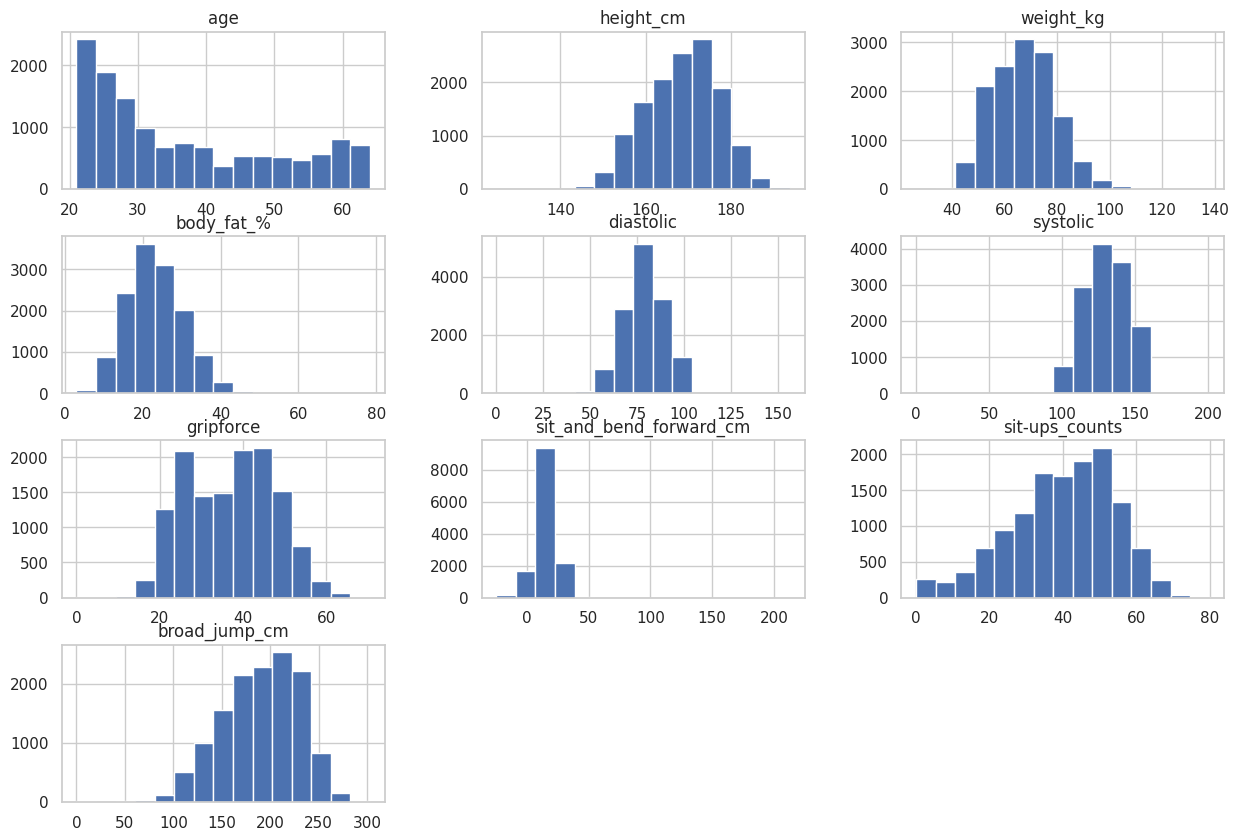

In [122]:
# histograms
data[numeric_cols].hist(figsize=(15, 10), bins=15)
plt.show()

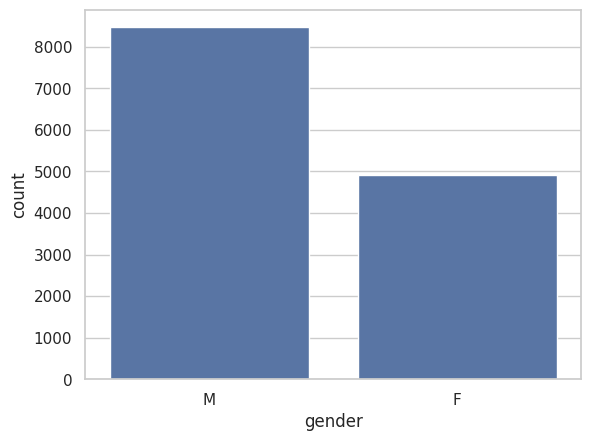

In [123]:
# countplots for gender
sns.countplot(x="gender", data=data)
plt.show()

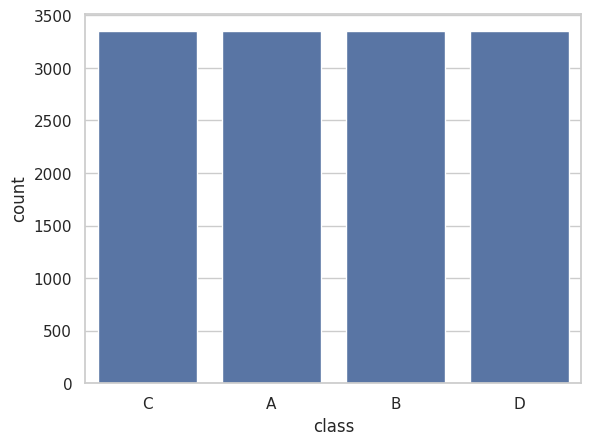

In [124]:
# countplots for classes
sns.countplot(x="class", data=data)
plt.show()

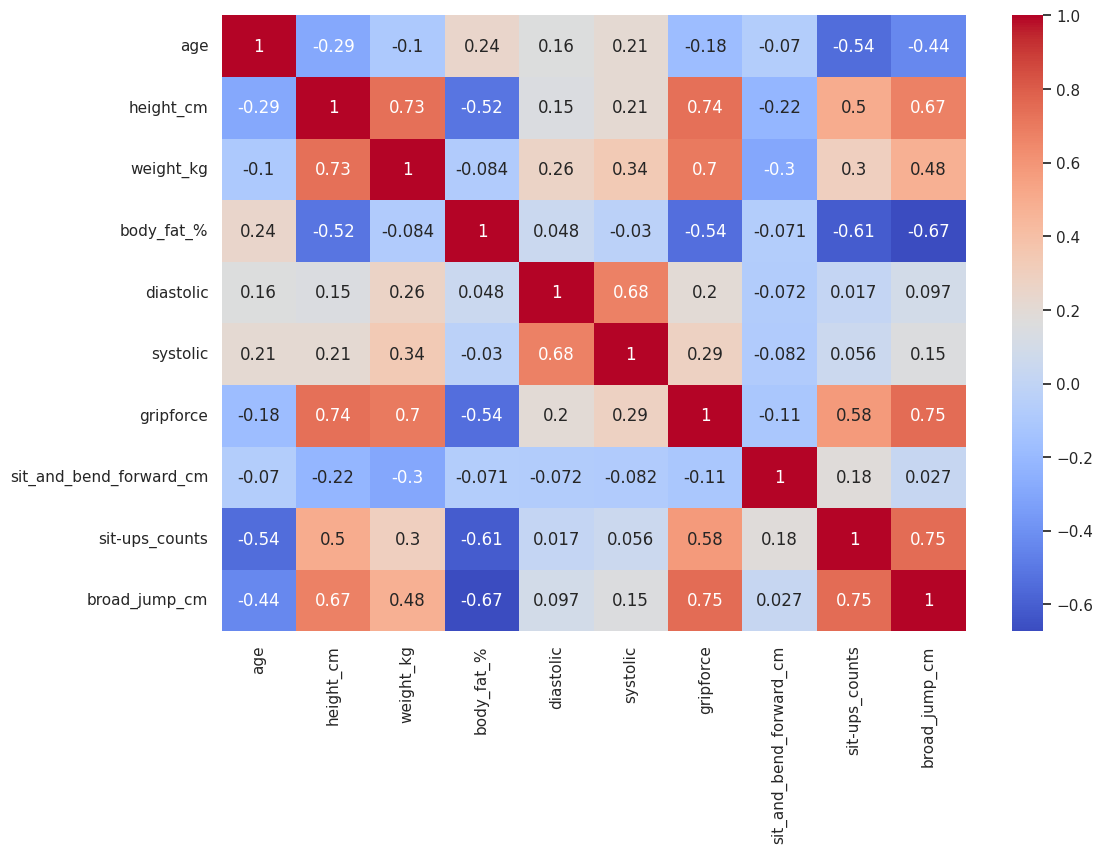

In [125]:
# correlation heatmap
corr = data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot = True,
    cmap = "coolwarm"
)
plt.show()

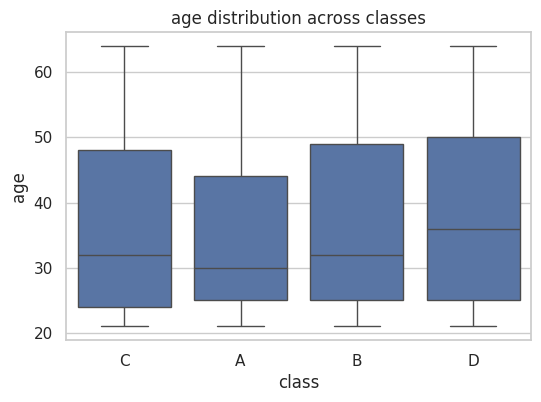

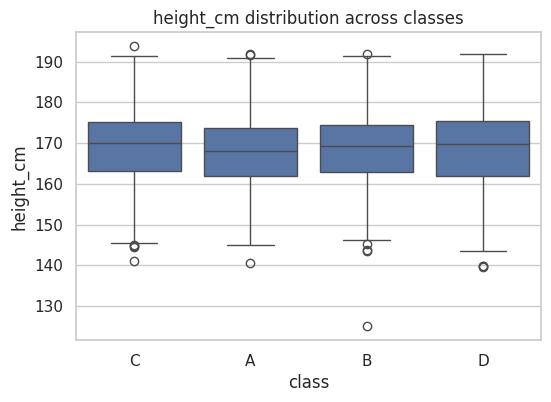

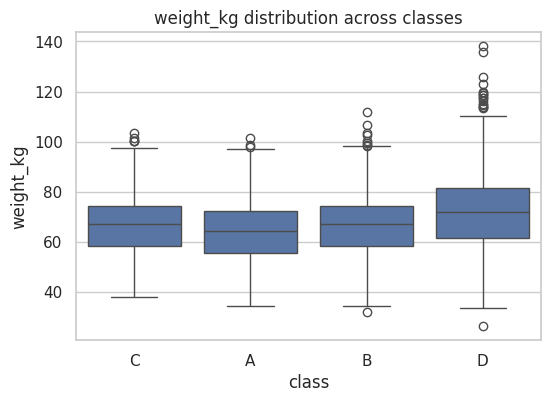

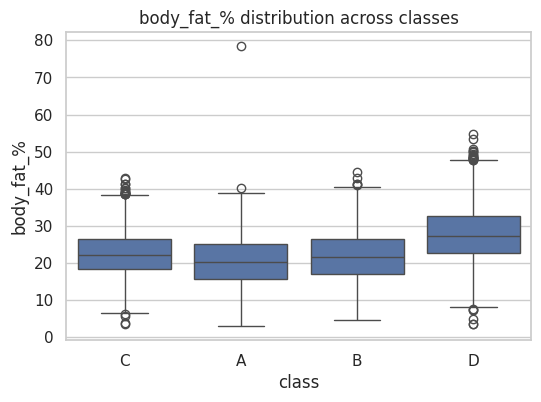

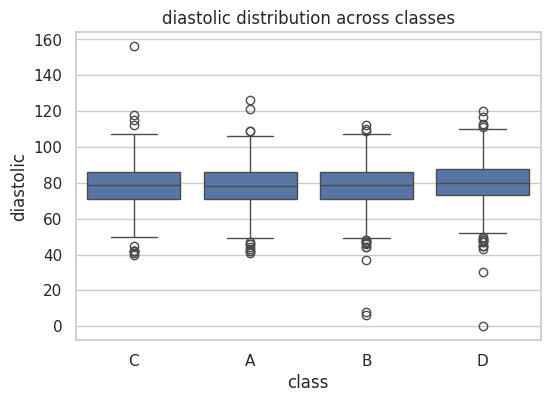

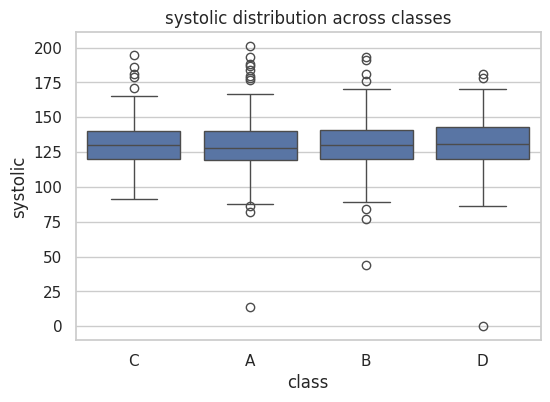

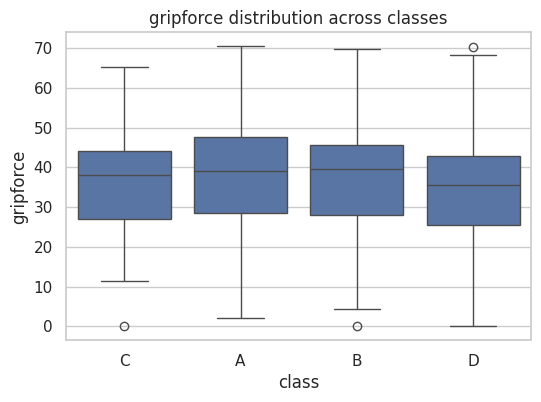

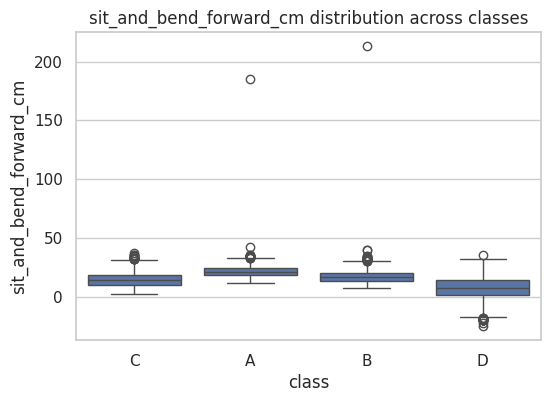

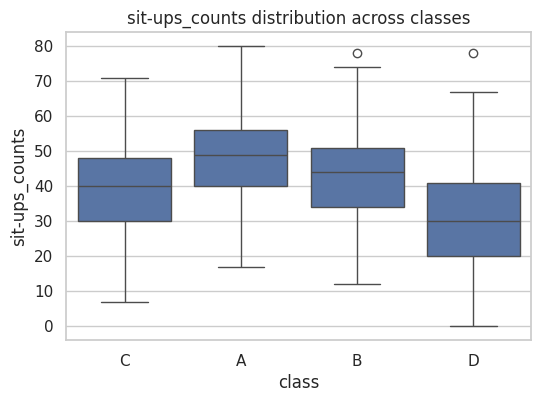

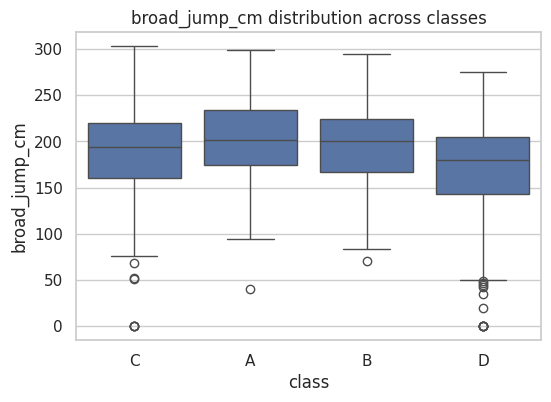

In [126]:
# boxplots per class
for column in numeric_cols:
  plt.figure(figsize=(6, 4))
  sns.boxplot(
      x = "class",
      y = column,
      data = data
  )
  plt.title(f"{column} distribution across classes")
  plt.show()

## preprocessing and feature selection

In [127]:
data.head(10)

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [128]:
# encoding gender, female--> 0, male --> 1
data["gender"] = data["gender"].replace(
    {"F": 0, "M": 1}
)
data["gender"].value_counts()

/tmp/ipython-input-3206275775.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["gender"] = data["gender"].replace(


,count
gender,
1,8467
0,4925


In [129]:
data.head(10)

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,0,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,0,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,1,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,1,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,1,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [130]:
# encoding classes
encoder = LabelEncoder()
data["class"] = encoder.fit_transform(data["class"])

In [131]:
data["class"].value_counts()

,count
class,
2,3349
3,3349
0,3347
1,3347


In [132]:
data.head(10)

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
5,36.0,0,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,1
6,42.0,0,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,3
7,33.0,1,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,1
8,54.0,1,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,2
9,28.0,1,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,1


In [133]:
encoder.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

## modelling and training

In [134]:
# feature selection
X, y = data.drop("class", axis=1), data["class"]
X.head(10)

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
5,36.0,0,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0
6,42.0,0,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0
7,33.0,1,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0
8,54.0,1,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0
9,28.0,1,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0


In [135]:
y.head(10)

,class
0,2
1,0
2,2
3,1
4,1
5,1
6,3
7,1
8,2
9,1


In [136]:
# scaling for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [137]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size = 0.2,
    random_state = 21,
    stratify = y
)
print(X.shape, X_train.shape, X_test.shape)

(13392, 11) (10713, 11) (2679, 11)


### random forest

In [138]:
# model initialization
rf_model = RandomForestClassifier(
    n_estimators = 200,
    random_state = 21
)

In [139]:
# model training
rf_model.fit(
    X_train,
    y_train
)

RandomForestClassifier(n_estimators=200, random_state=21)

In [140]:
# prediction
rf_pred = rf_model.predict(X_test)

In [141]:
# evaluation
accuracy = accuracy_score(
    y_test,
    rf_pred
)
rf_clf_report = classification_report(
    y_test,
    rf_pred,
    target_names = encoder.classes_
)

print(f"random forest accuracy: {accuracy:.3f}")
print("random forest classification report:\n", rf_clf_report)

random forest accuracy: 0.732
random forest classification report:
               precision    recall  f1-score   support

           A       0.73      0.84      0.78       669
           B       0.62      0.59      0.60       670
           C       0.70      0.67      0.69       670
           D       0.88      0.83      0.85       670

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.73      2679
weighted avg       0.73      0.73      0.73      2679



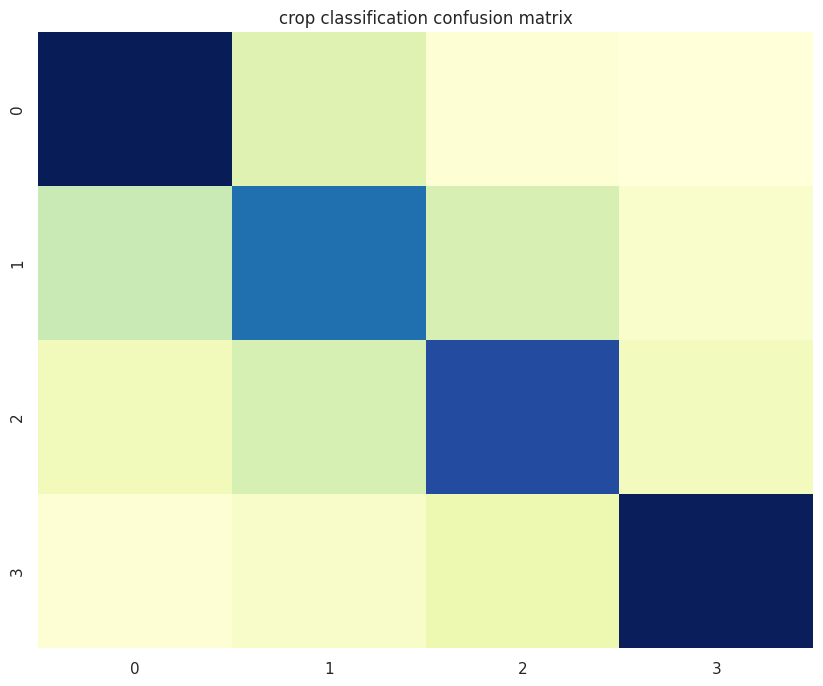

In [142]:
# confusion matrix
conf_matrix = confusion_matrix(
    y_test,
    rf_pred
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    cmap = "YlGnBu",
    cbar = False
)
plt.title("crop classification confusion matrix")
plt.show()

### xgboost

In [151]:
# model initialization
xgb_clf = XGBClassifier(
    n_estimators = 500,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 21,
    eval_metric = "mlogloss"
)

In [152]:
# training
xgb_clf.fit(
    X_train,
    y_train
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [153]:
# predictions
xgb_pred = xgb_clf.predict(X_test)

In [154]:
# evaluation
acc = accuracy_score(
    y_test, xgb_pred
)
xgb_clf_report = classification_report(
    y_test,
    xgb_pred,
    target_names = encoder.classes_
)
print(f"xgboost classifier accuracy: {acc:.3f}")
print("xgboost classifier classification report:\n", xgb_clf_report)

xgboost classifier accuracy: 0.758
xgboost classifier classification report:
               precision    recall  f1-score   support

           A       0.76      0.87      0.81       669
           B       0.65      0.62      0.64       670
           C       0.72      0.70      0.71       670
           D       0.91      0.84      0.87       670

    accuracy                           0.76      2679
   macro avg       0.76      0.76      0.76      2679
weighted avg       0.76      0.76      0.76      2679



# insights:
  - poor perfomance (explore tuning frontiers)
  - xgboost perfomed best but more could be done

## hyper parameter tuning

### tree parameters

In [156]:
# param grid
tree_param_grid = {
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5]
}

In [158]:
# tuner
tree_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=tree_param_grid,
    scoring='f1_macro',
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [159]:
# fitting tuner
tree_search.fit(
    X_train,
    y_train
)
print("best tree params:", tree_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
best tree params: {'min_child_weight': 1, 'max_depth': 6, 'gamma': 0.5}


### col_sample and subsample tuning

In [162]:
# param grid
sample_param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [163]:
xgb_clf_best_tree = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    random_state=21,
    **tree_search.best_params_
)

In [164]:
sample_search = RandomizedSearchCV(
    estimator=xgb_clf_best_tree,
    param_distributions=sample_param_grid,
    scoring='f1_macro',
    n_iter=9,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [165]:
sample_search.fit(X_train, y_train)
print("Best sampling params:", sample_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best sampling params: {'subsample': 1.0, 'colsample_bytree': 0.8}


### final model

In [171]:
final_xgb = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.05,
    random_state=21,
    **tree_search.best_params_,
    **sample_search.best_params_
)

In [172]:
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1500,
              n_jobs=None, num_parallel_tree=None, ...)

In [173]:
prediction = final_xgb.predict(X_test)

In [174]:
# evaluation
acc = accuracy_score(
    y_test, prediction
)
xgb_final_report = classification_report(
    y_test,
    prediction,
    target_names = encoder.classes_
)
print(f"xgboost final classifier accuracy: {acc:.3f}")
print("xgboost final classifier classification report:\n", xgb_final_report)

xgboost final classifier accuracy: 0.758
xgboost final classifier classification report:
               precision    recall  f1-score   support

           A       0.74      0.88      0.81       669
           B       0.66      0.62      0.64       670
           C       0.73      0.69      0.71       670
           D       0.91      0.84      0.87       670

    accuracy                           0.76      2679
   macro avg       0.76      0.76      0.76      2679
weighted avg       0.76      0.76      0.76      2679



## saving all artifacts


In [176]:
# saving the model
final_xgb.save_model("fitness_model.json")

# encoder
joblib.dump(encoder, "encoder.pkl")

# scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# modelling complete